In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Taller 10
## Problema 2
En el movimiento de tiro parabólico, se considera que la fuerza debida a la resistencia del aire es lo suficientemente pequeña como para ser despreciada. En el taller 1, se encontró que al tomar a la fuerza anterior como $\vec{f} = -b\vec{r}$, las ecuaciones de movimiento en el plano $xz$ ($x$ el eje horizontal y $z$ el eje vertical) eran:
$$ x = \frac{mv_{_x0}}{b}(1-e^{-bt/m}) $$
$$ z = \left(\frac{m^2g}{b^2} + \frac{mv_{_x0}}{b}\right)(1-e^{-bt/m}) - \frac{mg}{b}t $$
donde $m$ es la masa del proyectil y $v_{_z0}$, $v_{_z0}$ son las componentes horizontal y vertical de la velocidad inicial $v_0$, realice 5 gráficas en el _notebook_ adjunto para distintos valores de velocidad inicial $v_0 = |\vec{v_0}|$ y ángulo de
lanzamiento $\theta$.

Compare con el movimiento de tiro parabólico y explique cómo influye la resistencia del aire en el movimiento.

In [2]:
# Constantes #
v = 100
th = np.pi/8
g = 9.8

# Funciones para $x$ y $x$ #
def x(time, velocity_0=v, theta=th, mass=5, resistance=3):
    return (mass*velocity_0*np.cos(theta)/resistance)*(1-np.exp(-resistance*time/mass))

def xn(time, velocity_0=v, theta=th):
    return velocity_0*np.cos(theta)*time

def z(time, velocity_0=v, theta=th, mass=5, resistance=3):
    return ((np.power(mass,2)*g)/(np.power(resistance,2))+(mass*velocity_0*np.sin(theta))/resistance)*(1-np.exp(-resistance*time/mass))-(mass*g*time/resistance)

def zn(time, velocity_0=v, theta=th):
    return velocity_0*np.sin(theta)*time-g*np.power(time,2)/2

[Text(0, 0.5, '$y$'), Text(0, 0.5, '$y$')]

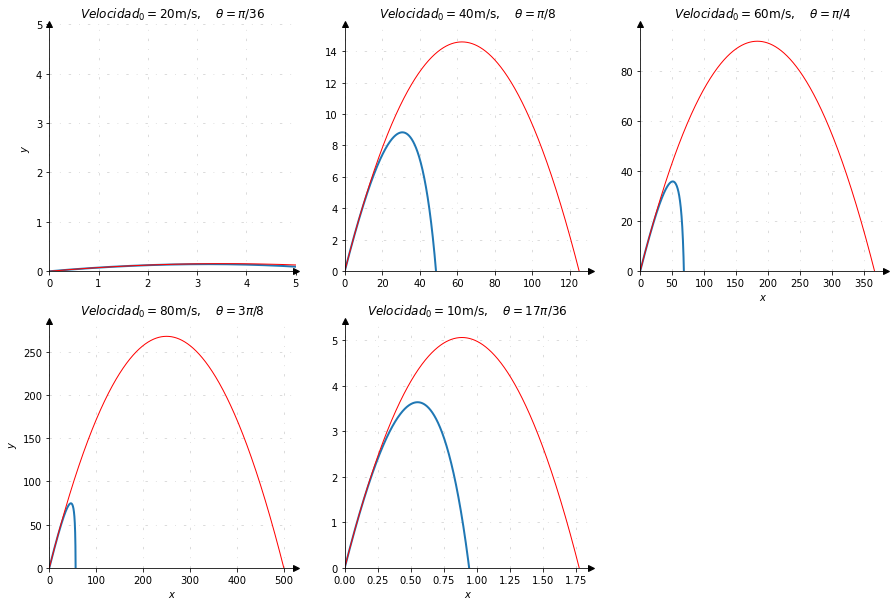

In [3]:
# Generar graficas #
fig, axs = plt.subplots(2,3, figsize=(15,10))

# Especificaciones para las graficas #
vel = [20,40,60,80,10]
angles = np.linspace(5,85,5)*np.pi/180
ang = ['\\pi/36','\\pi/8','\\pi/4','3\\pi/8','17\\pi/36']
for ax,i in zip(axs.flat, range(6)):
    if i == 5:
        ax.axis('off')
    else:
        # Generar valores para el tiempo #
        t = np.linspace(0,2*vel[i]*np.sin(angles[i])/g,1000)
        # Las graficas #
        xaxis = x(t, velocity_0=vel[i], theta=angles[i])
        yaxis = z(t, velocity_0=vel[i], theta=angles[i])
        ax.plot(xaxis,yaxis, lw=2)
        ax.plot(xn(t, velocity_0=vel[i], theta=angles[i]),zn(t, velocity_0=vel[i], theta=angles[i]), 'r', lw=1)
        ax.set_title(f'$Velocidad_0={vel[i]}$m/s,\t$\\theta={ang[i]}$')
        ax.grid(linestyle=(0, (3, 10, 1, 10)), linewidth=0.8, color='lightgray')
        if np.around(xaxis[yaxis>=0][-1]) == 0 or np.around(np.amax(yaxis)) == 0:
            ax.set_xlim(xmin=0, xmax=5)    #
            ax.set_ylim(ymin=0, ymax=5)
        else:
            limit = max(xaxis[yaxis>=0][-1],np.amax(yaxis))
            ax.set_xlim(xmin=0)    #
            ax.set_ylim(ymin=0)
        
        # Move the left and bottom spines to x = 0 and y = 0, respectively.
        ax.spines[["left", "bottom"]].set_position(("data", 0))
        # Hide the top and right spines.
        ax.spines[["top", "right"]].set_visible(False)
        
        ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
        ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

        
axs[0,2].set_xlabel('$x$')
plt.setp(axs[-1,:], xlabel='$x$')
plt.setp(axs[:,0], ylabel='$y$')

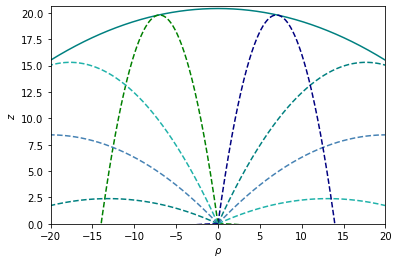

In [5]:
fig, ax = plt.subplots(1)

velocidad = 20
rho = np.linspace(-velocidad,velocidad,1000)
zeta = lambda r: velocidad**2/(2*g)-g*(r**2)/(2*(velocidad**2))

t = np.linspace(0,5,1000)
def rhot(time, ang=0):
    return velocidad*np.cos(ang*np.pi/180)*time
def zetat(time, ang=0):
    return velocidad*np.sin(ang*np.pi/180)*time - (g*(time**2))/2

yaxis = zeta(rho);
ax.plot(rho,yaxis, 'teal');

angs = np.linspace(0,180,10)
c = ['green', 'lightseagreen', 'steelblue', 'teal', 'navy']*2
for i in range(10):
    ax.plot(rhot(t,ang=angs[i]),zetat(t,ang=angs[i]),linestyle='--', color=c[i]);

ax.set_xlabel('$\\rho$')    
ax.set_ylabel('$z$')
ax.set_xlim(xmin=rho[0],xmax=rho[-1]);
ax.set_ylim(ymin=0,ymax=np.amax(yaxis)*(1+0.01));